In [1]:
import numpy as np
import matplotlib.pyplot as plt
from BaroPlane import BarotropicPlane

B=BarotropicPlane()

In [2]:
B.lats1

array([-1.25  , -1.1875, -1.125 , -1.0625, -1.    , -0.9375, -0.875 ,
       -0.8125, -0.75  , -0.6875, -0.625 , -0.5625, -0.5   , -0.4375,
       -0.375 , -0.3125, -0.25  , -0.1875, -0.125 , -0.0625,  0.    ,
        0.0625,  0.125 ,  0.1875,  0.25  ,  0.3125,  0.375 ,  0.4375,
        0.5   ,  0.5625,  0.625 ,  0.6875,  0.75  ,  0.8125,  0.875 ,
        0.9375,  1.    ,  1.0625,  1.125 ,  1.1875,  1.25  ])

In [3]:
#total number of steps to take
Nsteps = int(20*24*3600/B.dt)
#how often to take snapshots
dN_snap = int(6*3600/B.dt)
#total number of snapshots
Nsnaps = int(Nsteps/dN_snap)

print(Nsteps,dN_snap,Nsnaps)

#first time step 
vrt0 = B.vrtg_unstable_jet(m=3.5,A=2.5e-4)# + 1e-6*np.random.randn(B.nlat,B.nlon)
vrt1 = vrt0 + B.dt * B.jac_term(vrt0)

#add these into B
B.vrtg_m1 = vrt0
B.vrtg = vrt0

#initialize the snapshots
vrt = np.zeros([Nsnaps+1,B.nlat,B.nlon])
vrt[0] = vrt0
ksnap = 1

tdamp = 1/(24*3600*12)
NS = 1e-10

#main time loop
for i in range(1,Nsteps+1):
    B.RA_leapfrog()

    
    B.vrtg = B.vrtg * NS * np.random.randn(B.nlat,B.nlon)
    B.vrtg = B.vrtg * tdamp / (tdamp + B.dt)

    if i%dN_snap == 0:
        print(i,ksnap,np.max(B.vrtg))
        vrt[ksnap] = np.copy(B.vrtg)
        ksnap += 1

960 12 80


/home/rfajber/code/BaroSphere/BaroPlane.py:76: RuntimeWarning: divide by zero encountered in true_divide
  psis = vrts/self.indxk2
/home/rfajber/code/BaroSphere/BaroPlane.py:76: RuntimeWarning: invalid value encountered in true_divide
  psis = vrts/self.indxk2


NameError: name 'tdamp' is not defined

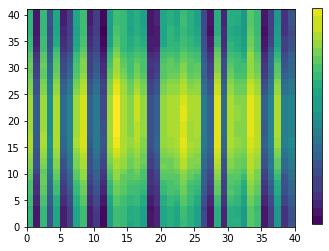

In [ ]:
plt.pcolor(vrt[25])
plt.colorbar()

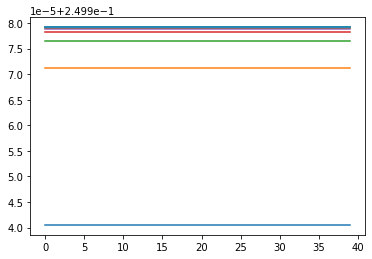

In [ ]:
plt.plot(vrt[:,0,:].T)